In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/DatasetFinalNC.xlsx"
df = pd.read_excel(file_path)

<ipython-input-1-dfffbdcbf418>:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Nivel Estudios', y='Salario', ci='sd', ax=axes[1])


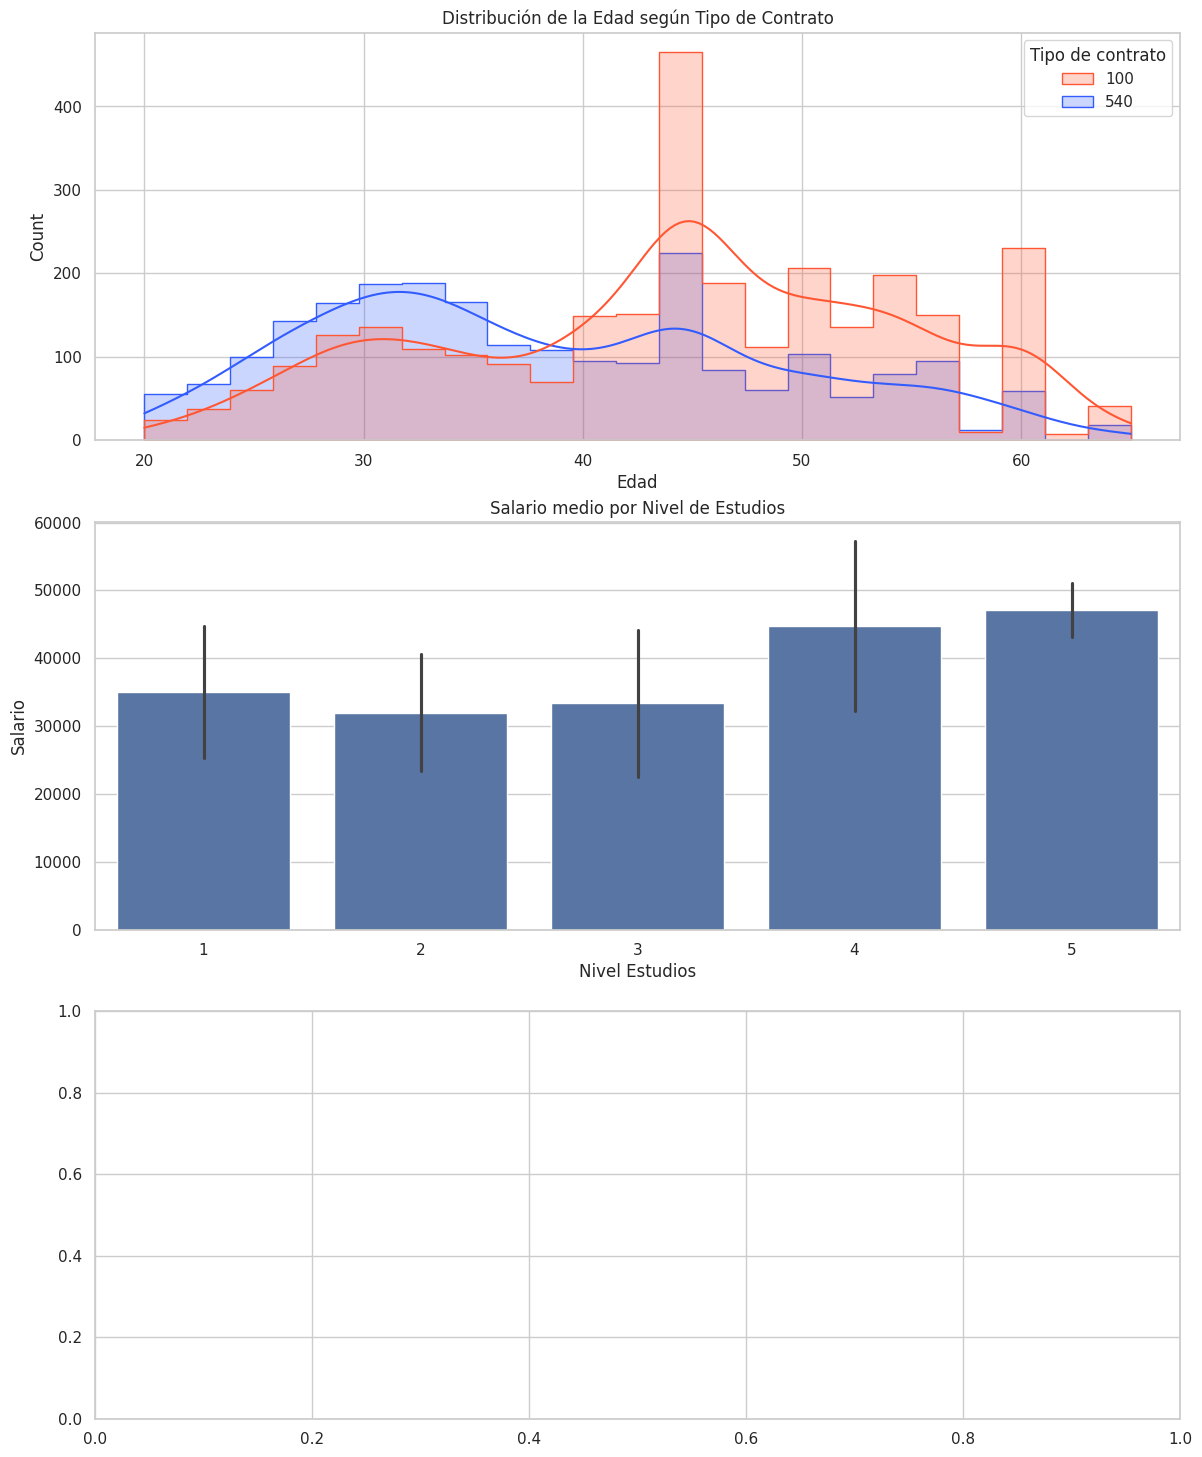

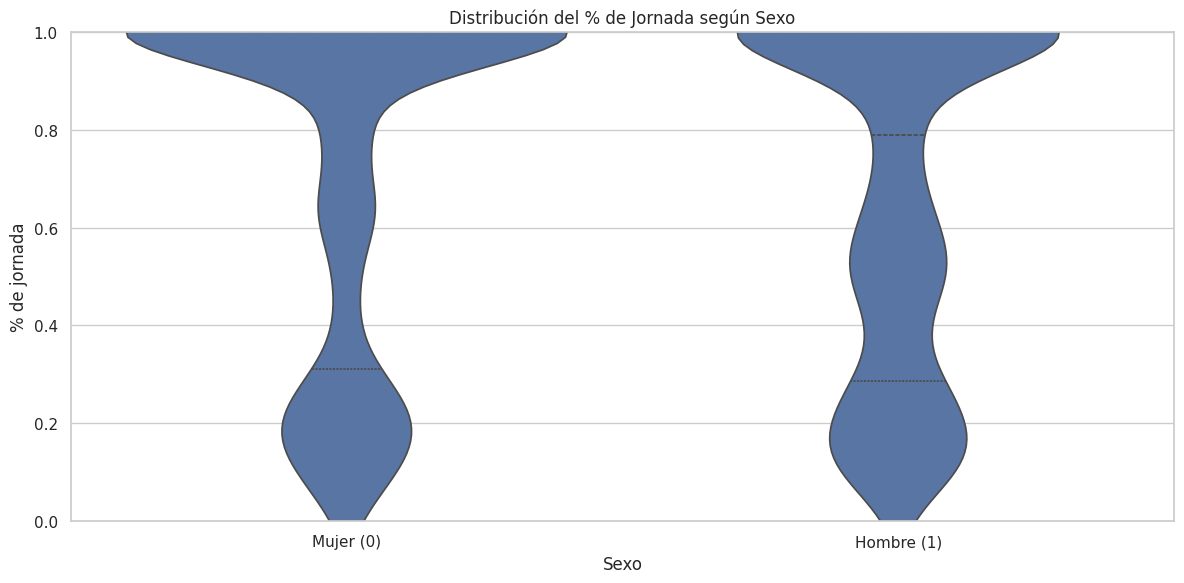

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


file_path = "/content/DatasetFinalNC.xlsx"
df = pd.read_excel(file_path)


sns.set(style="whitegrid")


corr_edad_contrato = pearsonr(df['Edad'], df['Tipo de contrato'])[0]
corr_salario_estudios = pearsonr(df['Salario'], df['Nivel Estudios'])[0]
corr_jornada_sexo = pearsonr(df['% de jornada'], df['Sexo'])[0]


fig, axes = plt.subplots(3, 1, figsize=(14, 18))


palette_contratos = {100: "#FF5733", 540: "#335CFF"}
sns.histplot(
    data=df,
    x='Edad',
    hue='Tipo de contrato',
    kde=True,
    element='step',
    common_norm=False,
    ax=axes[0],
    palette=palette_contratos
)
axes[0].set_title(f'Distribución de la Edad según Tipo de Contrato')


sns.barplot(data=df, x='Nivel Estudios', y='Salario', ci='sd', ax=axes[1])
axes[1].set_title(f'Salario medio por Nivel de Estudios')


plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Sexo', y='% de jornada', inner='quartile')
plt.title(f'Distribución del % de Jornada según Sexo')
plt.xlabel('Sexo')
plt.ylabel('% de jornada')
plt.xticks([0, 1], ['Mujer (0)', 'Hombre (1)'])
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-3-5b0a4cef57e7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salario_corr.values, y=salario_corr.index, palette="coolwarm", orient='h')


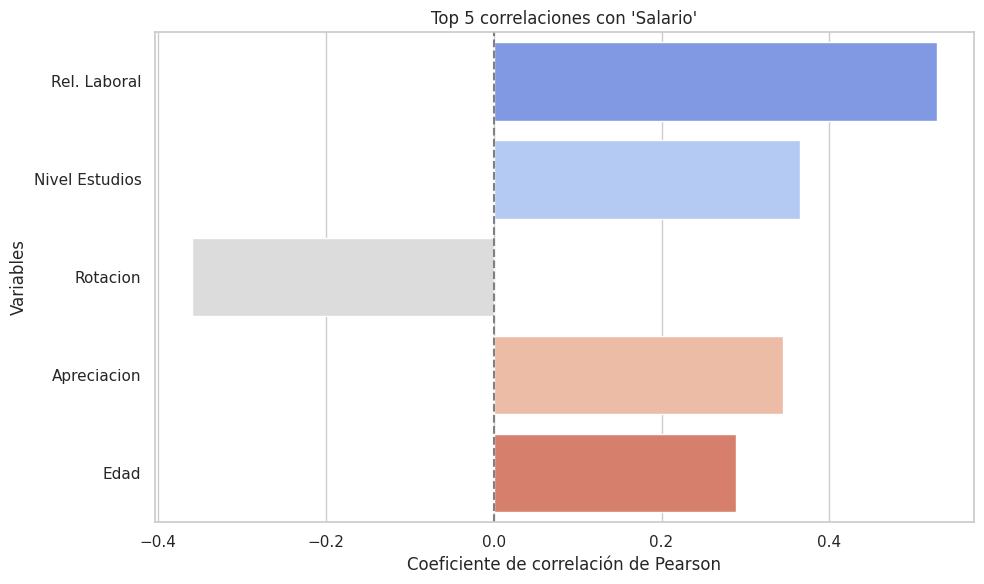

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr(numeric_only=True)

salario_corr = correlation_matrix["Salario"].drop("Salario").sort_values(key=abs, ascending=False).head(5)


plt.figure(figsize=(10, 6))
sns.barplot(x=salario_corr.values, y=salario_corr.index, palette="coolwarm", orient='h')
plt.title("Top 5 correlaciones con 'Salario'")
plt.xlabel("Coeficiente de correlación de Pearson")
plt.ylabel("Variables")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

<ipython-input-19-5d1f602db407>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Rel. Laboral', y='Salario', ci='sd')


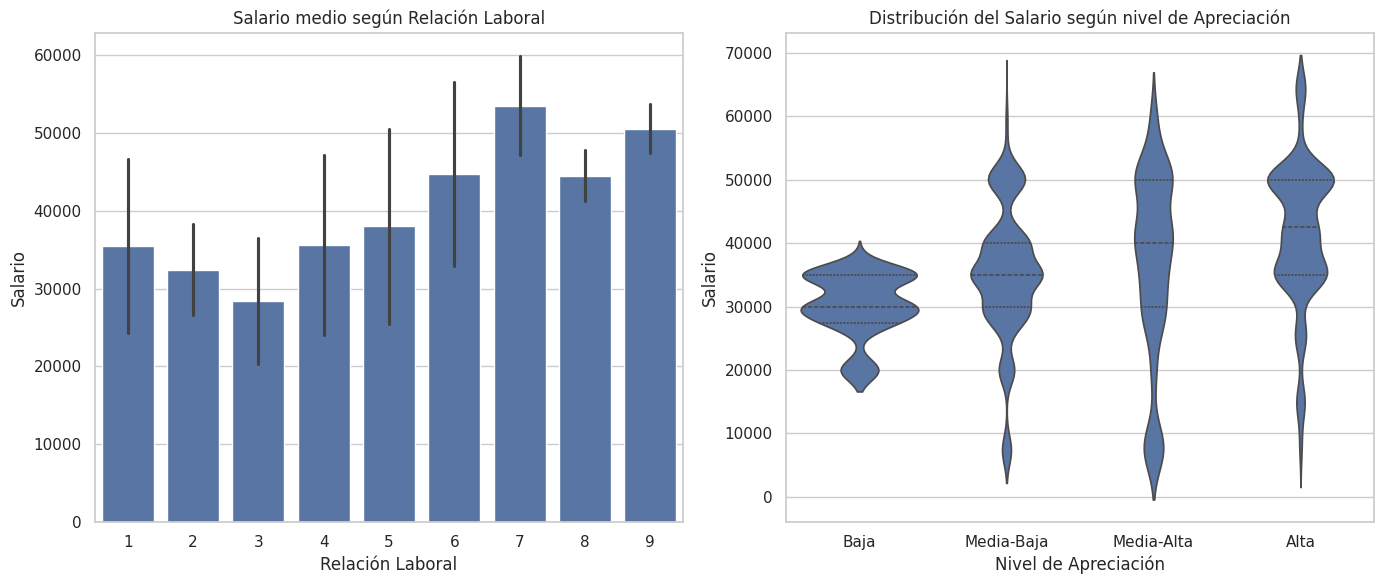

In [19]:
df['Apreciacion_bin'] = pd.cut(df['Apreciacion'], bins=[0, 3, 5, 7, 10], labels=['Baja', 'Media-Baja', 'Media-Alta', 'Alta'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Rel. Laboral', y='Salario', ci='sd')
plt.title('Salario medio según Relación Laboral')
plt.xlabel('Relación Laboral')
plt.ylabel('Salario')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='Apreciacion_bin', y='Salario', inner='quartile')
plt.title('Distribución del Salario según nivel de Apreciación')
plt.xlabel('Nivel de Apreciación')
plt.ylabel('Salario')

plt.tight_layout()
plt.show()


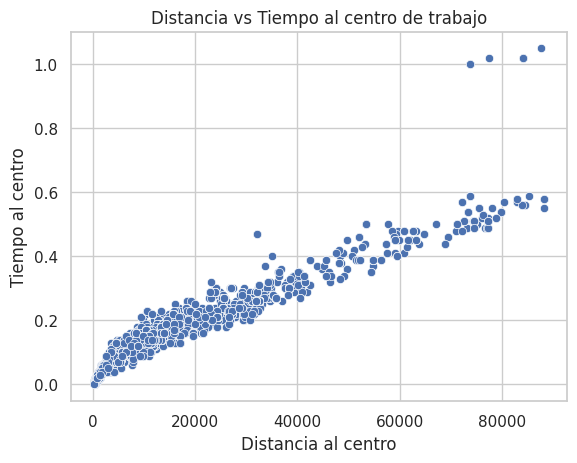

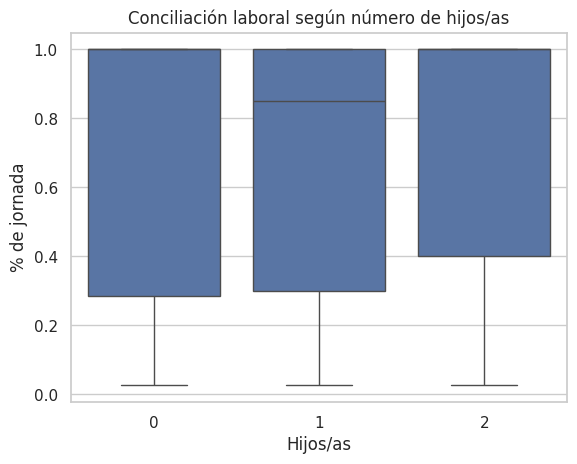

In [20]:
sns.scatterplot(data=df, x='Distancia al centro', y='Tiempo al centro')
plt.title('Distancia vs Tiempo al centro de trabajo')
plt.show()

sns.boxplot(x='Hijos/as', y='% de jornada', data=df)
plt.title('Conciliación laboral según número de hijos/as')
plt.show()


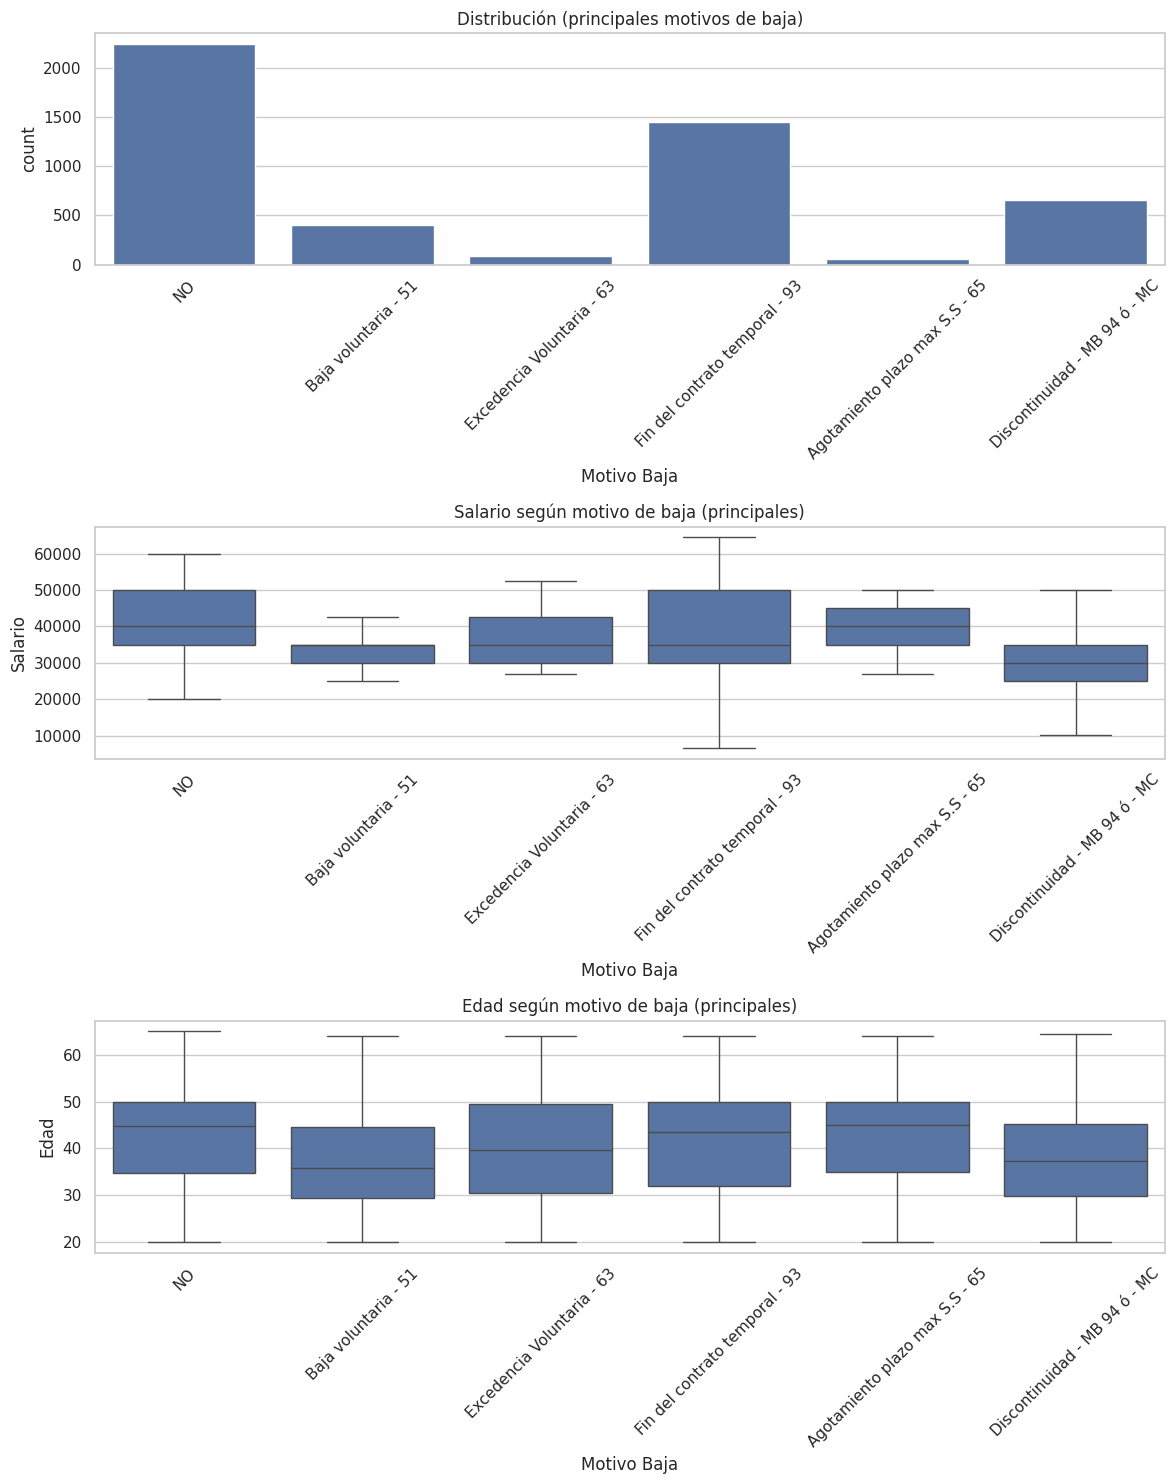

In [21]:
top_motivos = df[df['Motivo Baja'] != 'NO']['Motivo Baja'].value_counts().head(5).index.tolist()

motivos_seleccionados = ['NO'] + top_motivos
df_filtrado = df[df['Motivo Baja'].isin(motivos_seleccionados)]

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

sns.countplot(ax=axes[0], data=df_filtrado, x='Motivo Baja')
axes[0].set_title('Distribución (principales motivos de baja)')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[1], data=df_filtrado, x='Motivo Baja', y='Salario', showfliers=False)
axes[1].set_title('Salario según motivo de baja (principales)')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[2], data=df_filtrado, x='Motivo Baja', y='Edad')
axes[2].set_title('Edad según motivo de baja (principales)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show();

Análisis de negocio

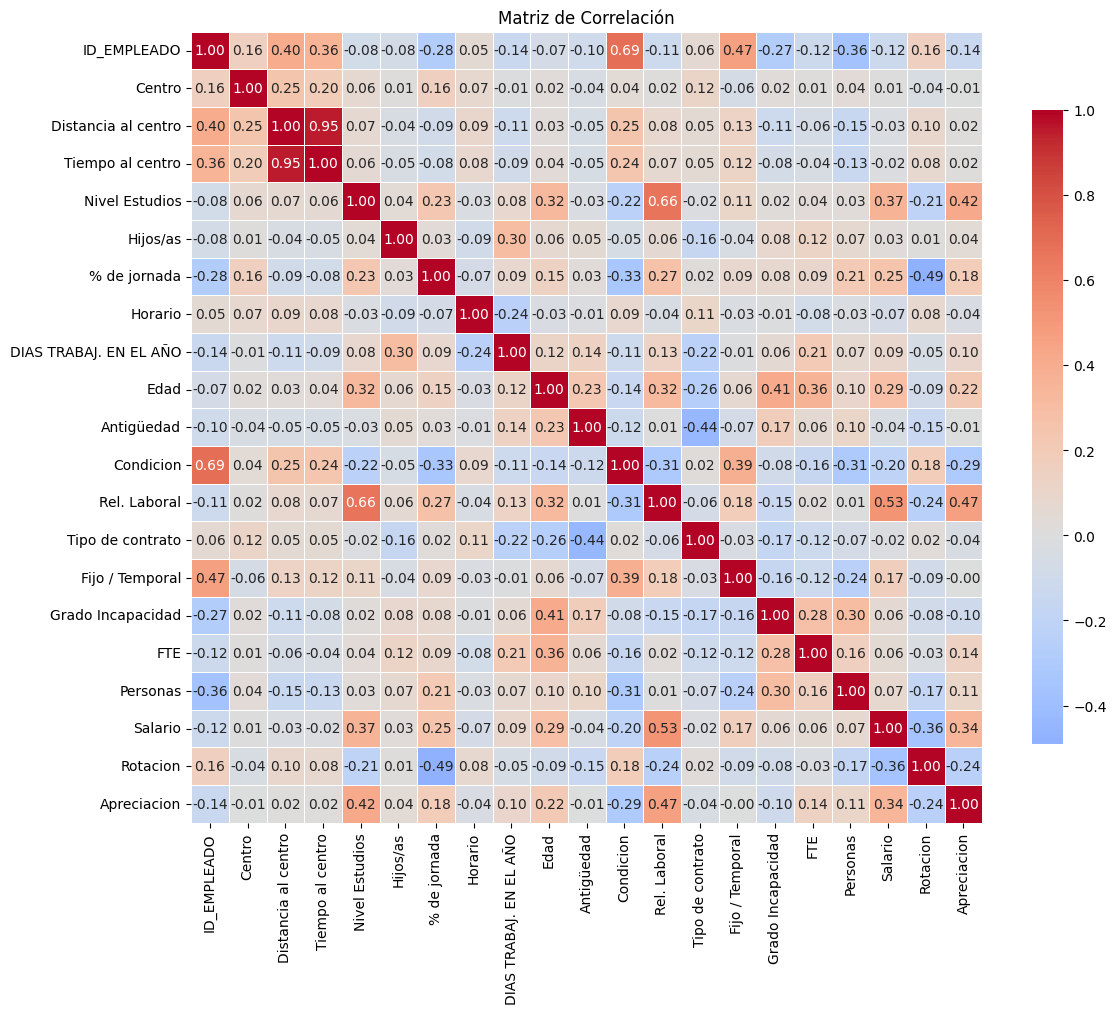

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/DatasetFinalNC.xlsx"
df = pd.read_excel(file_path)

corr_matrix = df.corr(numeric_only=True)

abs_corr = corr_matrix.abs()
mask = (abs_corr > 0.2).sum(axis=1) > 1
filtered_corr = corr_matrix.loc[mask, mask]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()


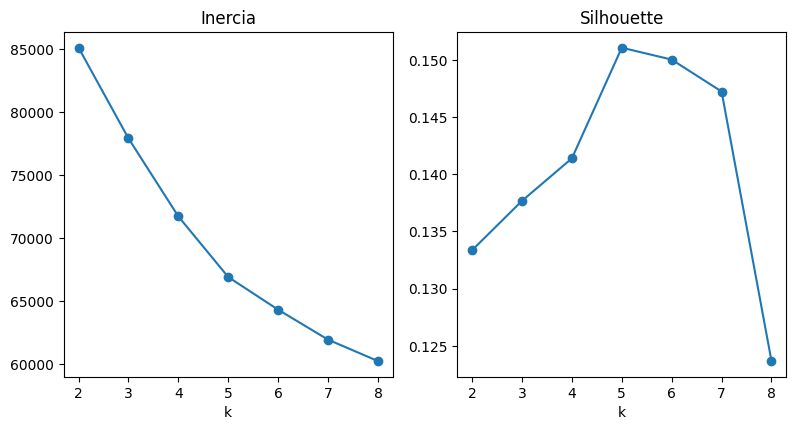


=== Métricas para k = 5 ===
Silhouette: 0.1510636470193829
Calinski-Harabasz: 601.8014978817861
Dunn: 0.03332887161603404
Gap: 0.46081460906701643
Estabilidad ARI: 0.9885181649709127

Archivo guardado en: MasterDataset_k5.xlsx


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score,
                             adjusted_rand_score)

FILE_IN  = "/content/DatasetFinalNC.xlsx"
FILE_OUT = "MasterDataset_k5.xlsx"

df = pd.read_excel(FILE_IN)

feat_cols = [
    "Centro","Sexo","Condicion","Rel. Laboral","Tipo de contrato",
    "Fijo / Temporal","Nivel Estudios","Antigüedad","Edad",
    "Salario","Apreciacion","Distancia al centro",
    "Tiempo al centro","Hijos/as","% de jornada","Horario",
    "Grado Incapacidad","FTE","Personas"
]
X = df[feat_cols].fillna(df[feat_cols].mean())
X_scaled = StandardScaler().fit_transform(X)

ks = range(2, 9)

def dunn_index(X, labels):
    """Devuelve el índice de Dunn (max → mejor)"""
    from scipy.spatial.distance import cdist, pdist
    clusters = [X[labels == k] for k in np.unique(labels)]
    intra_dists = [pdist(c, metric='euclidean').max() if len(c) > 1 else 0
                   for c in clusters]
    max_intra = max(intra_dists)
    inter = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist_ij = cdist(clusters[i], clusters[j], metric='euclidean').min()
            inter = min(inter, dist_ij)
    return inter / max_intra if max_intra > 0 else 0

def gap_statistic(X, refs=10, k_max=10):
    """Calcula Gap Statistic (Tibshirani, 2001) para k = 1 … k_max"""
    from sklearn.cluster import KMeans
    from numpy.random import default_rng
    rng = default_rng(42)
    shape = X.shape
    tops = X.max(axis=0); lows = X.min(axis=0)
    gaps = np.zeros(k_max)
    s_k  = np.zeros(k_max)
    for k in range(1, k_max + 1):
        km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
        orig_disp = np.log(km.inertia_)
        ref_disps = np.zeros(refs)
        for i in range(refs):
            random_ref = rng.uniform(lows, tops, size=shape)
            ref_km = KMeans(n_clusters=k, n_init=3, random_state=42).fit(random_ref)
            ref_disps[i] = np.log(ref_km.inertia_)
        gaps[k-1] = ref_disps.mean() - orig_disp
        s_k[k-1]  = np.sqrt(((ref_disps - ref_disps.mean())**2).sum() / refs) * np.sqrt(1 + 1/refs)
    return gaps, s_k

inertia, silh, ch, dunn, db = [], [], [], [], []
gap, gap_err = gap_statistic(X_scaled, refs=20, k_max=max(ks))

for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)

    inertia.append(km.inertia_)
    silh.append(silhouette_score(X_scaled, labels))
    ch.append(calinski_harabasz_score(X_scaled, labels))
    dunn.append(dunn_index(X_scaled, labels))
    db.append(davies_bouldin_score(X_scaled, labels))

def bootstrap_stability(X, k, n_iter=30, sample_frac=0.8):
    n = X.shape[0]
    labels_master = KMeans(n_clusters=k, n_init=10,
                           random_state=42).fit_predict(X)
    scores = []
    rng = np.random.default_rng(123)
    for _ in range(n_iter):
        idx = rng.choice(n, int(n*sample_frac), replace=False)
        labels_sub = KMeans(n_clusters=k, n_init=10,
                            random_state=42).fit_predict(X[idx])
        scores.append(adjusted_rand_score(labels_master[idx], labels_sub))
    return np.mean(scores)

stab = [bootstrap_stability(X_scaled, k) for k in ks]

plt.figure(figsize=(12, 8))

plt.subplot(231); plt.plot(ks, inertia, 'o-'); plt.title("Inercia"); plt.xlabel("k")
plt.subplot(232); plt.plot(ks, silh, 'o-');    plt.title("Silhouette"); plt.xlabel("k")

plt.tight_layout(); plt.show()

k_final = 5
km5 = KMeans(n_clusters=k_final, n_init=10, random_state=42)
df["cluster_5"] = km5.fit_predict(X_scaled)

print("\n=== Métricas para k = 5 ===")
print("Silhouette:",       silh[ks.index(5)])
print("Calinski-Harabasz:", ch[ks.index(5)])
print("Dunn:",              dunn[ks.index(5)])
print("Gap:",               gap[4])
print("Estabilidad ARI:",   stab[ks.index(5)])

df.to_excel(FILE_OUT, index=False)
print(f"\nArchivo guardado en: {FILE_OUT}")

In [1]:
import pandas as pd

FILE   = "/content/DatasetFinal.xlsx"
CL_COL = "cluster_5"

df = pd.read_excel(FILE)

counts = df[CL_COL].value_counts().sort_index()
print("\nNº de empleados por cluster:")
print(counts)



Nº de empleados por cluster:
cluster_5
0    1259
1    1430
2     763
3     652
4    1061
Name: count, dtype: int64


In [23]:
# PREGUNTA 1: Perfil detallado de cada cluster
import pandas as pd

FILE_IN  = "/content/DatasetFinal.xlsx"
FILE_OUT = "Cluster_Profile.xlsx"

df = pd.read_excel(FILE_IN)

cont_cols = ["Salario", "Antigüedad", "Edad", "Apreciacion", "Distancia al centro",
             "Nivel Estudios", "Rel. Laboral", "FTE"]
cat_cols  = ["Fijo / Temporal", "Rotacion"]


cont_stats = (
    df.groupby("cluster_5")[cont_cols]
      .agg(["mean", "median"])
      .round(2)
)


cont_stats.columns = ['_'.join(col) for col in cont_stats.columns]

agg = (
    df.groupby("cluster_5")
      .agg(
         Temporal_rate=("Fijo / Temporal", "mean"),
         Rotacion_rate=("Rotacion", "mean"),
         Num_empleados=("cluster_5", "size")
      )
      .round(3)
)

profile = pd.concat([agg, cont_stats], axis=1).reset_index()

cols_order = ["cluster_5", "Num_empleados",
              "Salario_mean", "Antigüedad_mean", "Edad_mean", "Apreciacion_mean",
              "Distancia al centro_mean", "Nivel Estudios_mean", "Rel. Laboral_mean", "FTE_mean",
              "Temporal_rate", "Rotacion_rate"]

profile = profile[[col for col in cols_order if col in profile.columns]]

print("\n=== Perfil resumido por cluster ===")
print(profile)

profile.to_excel(FILE_OUT, index=False)
print(f"\nTabla exportada a: {FILE_OUT}")




=== Perfil resumido por cluster ===
   cluster_5  Num_empleados  Salario_mean  Antigüedad_mean  Edad_mean  \
0          0           1259      38719.39             5.64      49.78   
1          1           1430      32606.60             1.24      32.98   
2          2            763      45180.21             5.42      42.83   
3          3            652      53531.44             4.70      50.46   
4          4           1061      26312.44             7.72      37.46   

   Apreciacion_mean  Distancia al centro_mean  Nivel Estudios_mean  \
0              5.38                  19426.96                 3.20   
1              5.17                  23938.67                 2.82   
2              7.82                  20222.55                 3.87   
3              7.10                  28683.25                 4.28   
4              4.51                  23295.84                 2.34   

   Rel. Laboral_mean  FTE_mean  Temporal_rate  Rotacion_rate  
0               4.03      0.72          

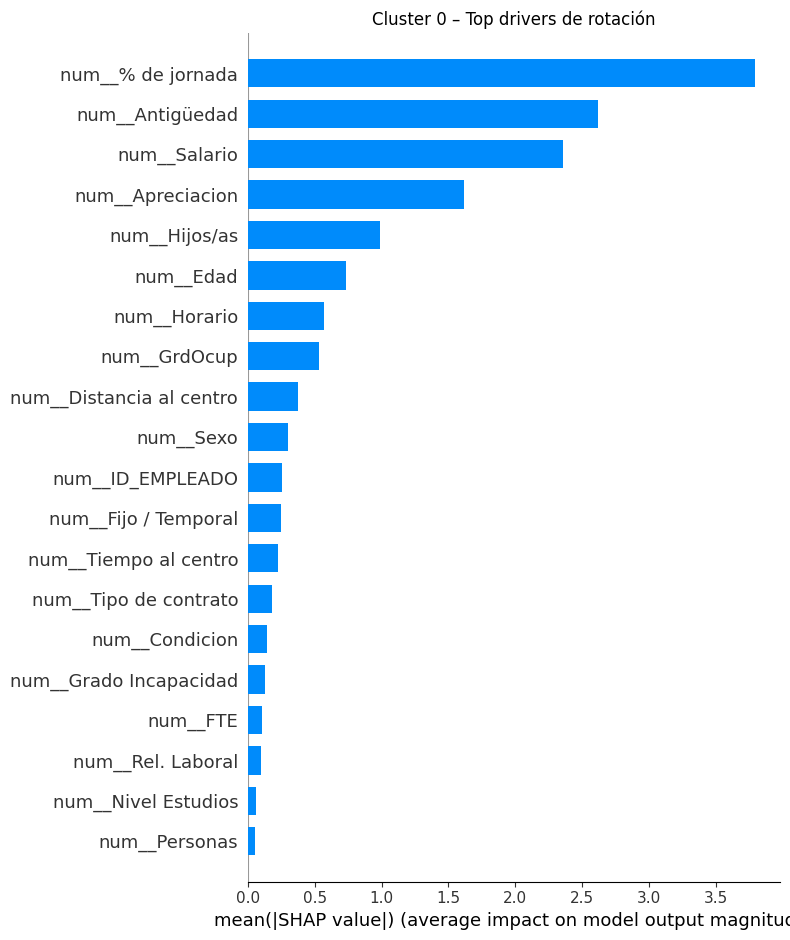

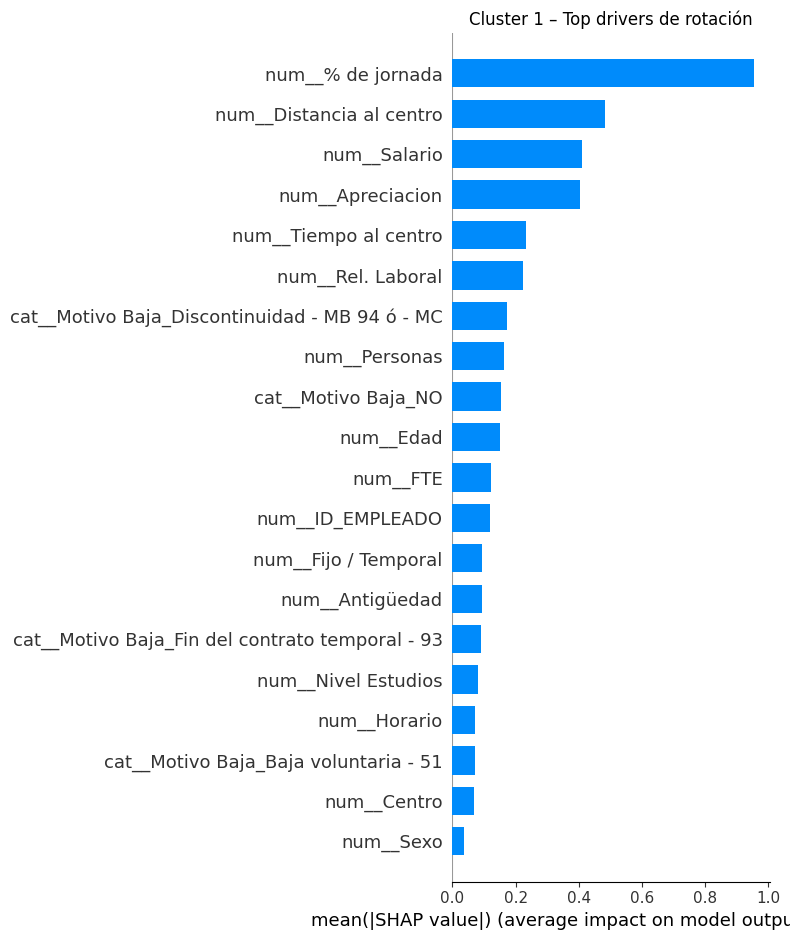

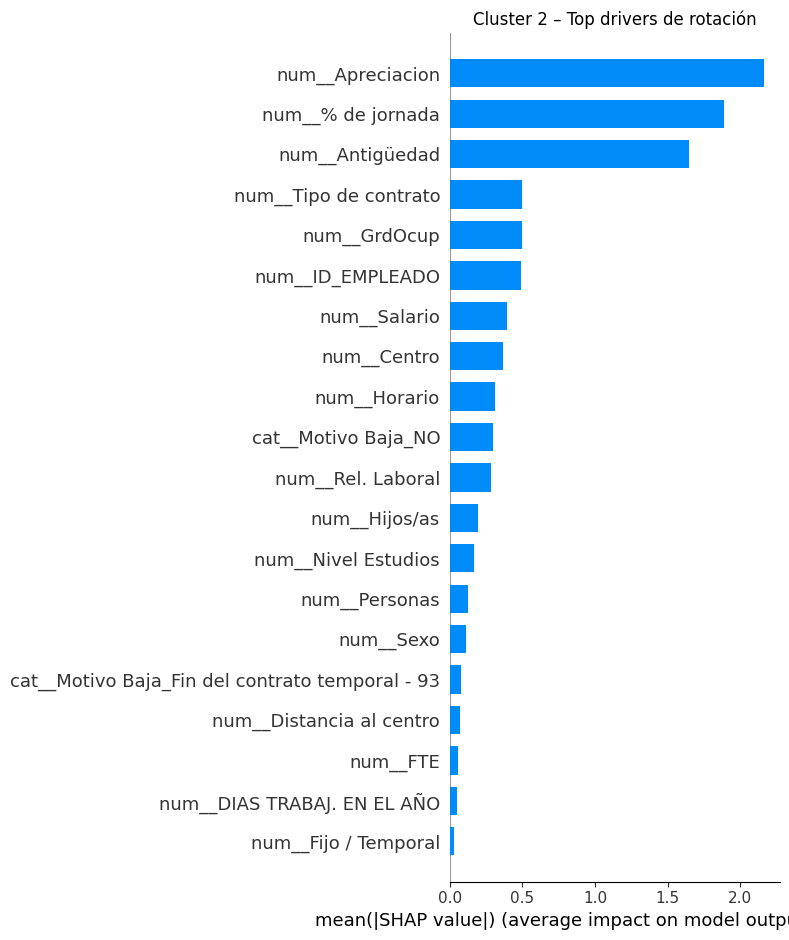

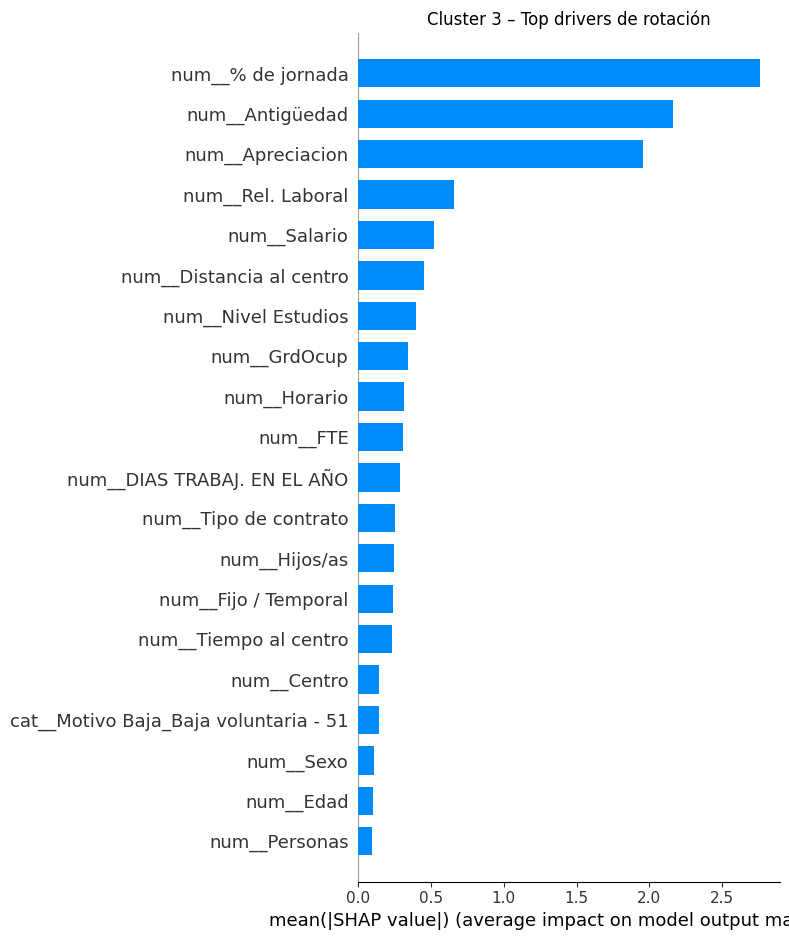

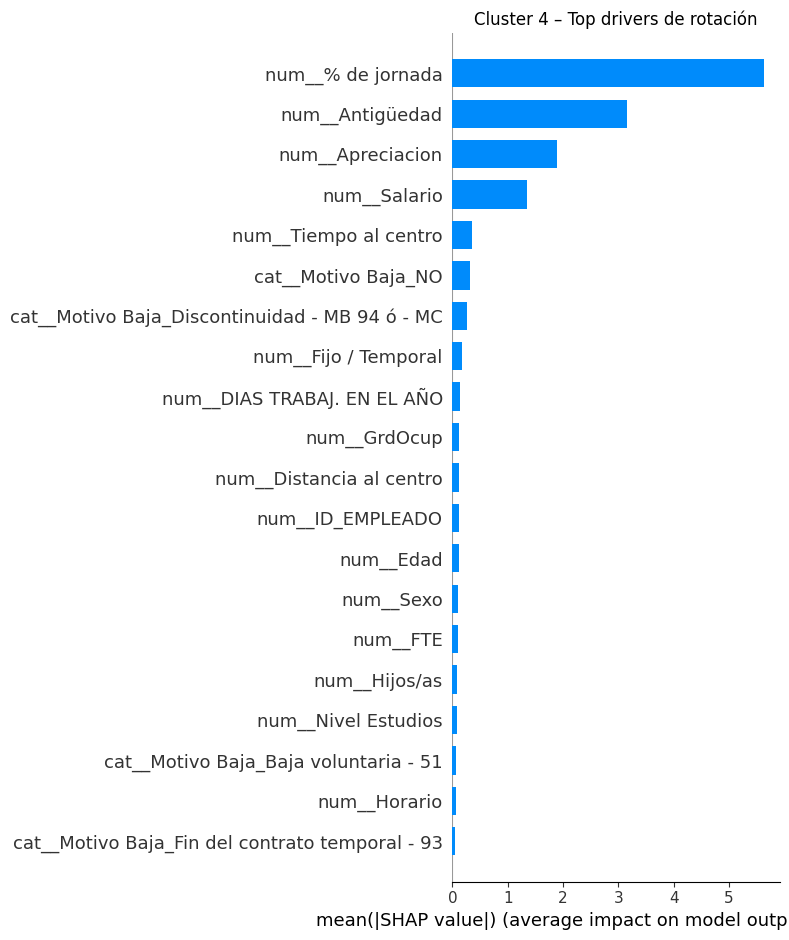


AUC/Acc por cluster: [(np.int64(0), 0.9873015873015873), (np.int64(1), 0.7150837988826816), (np.int64(2), 0.9842931937172775), (np.int64(3), 0.9693251533742331), (np.int64(4), 0.9849624060150376)]


In [1]:
# PREGUNTA 2: ¿Qué variables disparan la rotación dentro de cada cluster?

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import shap, matplotlib.pyplot as plt

FILE = "/content/MasterDataset_k5_noOut_modificado_final2.xlsx"
df = pd.read_excel(FILE)

target = "Rotacion"
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols.remove(target)

results = []

for cl in sorted(df["cluster_5"].unique()):
    dfi = df[df["cluster_5"] == cl].copy()

    X = dfi[num_cols + cat_cols]
    y = dfi[target]

    numeric_transformer = Pipeline([("scaler", StandardScaler())])
    categorical_transform = OneHotEncoder(handle_unknown="ignore")

    preproc = ColumnTransformer(
        [("num", numeric_transformer, num_cols),
         ("cat", categorical_transform, cat_cols)]
    )

    model = LogisticRegression(max_iter=1000, class_weight="balanced")

    pipe = Pipeline([("prep", preproc),
                     ("clf", model)])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y)

    pipe.fit(X_train, y_train)
    auc = pipe.score(X_test, y_test)
    results.append((cl, auc))

    # --- SHAP: dentro del bucle ---
    explainer = shap.Explainer(pipe["clf"], pipe["prep"].transform(X_train))
    shap_values = explainer(pipe["prep"].transform(X_test))

    feature_names = pipe["prep"].get_feature_names_out()
    X_test_transformed = pipe["prep"].transform(X_test)
    X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

    shap.summary_plot(shap_values, features=X_test_df, feature_names=feature_names,
                      show=False, plot_type="bar")
    plt.title(f"Cluster {cl} – Top drivers de rotación")
    plt.tight_layout()
    plt.show()

print("\nAUC/Acc por cluster:", results)


In [26]:
!pip install lifelines --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.8 MB/s eta 0:00:00


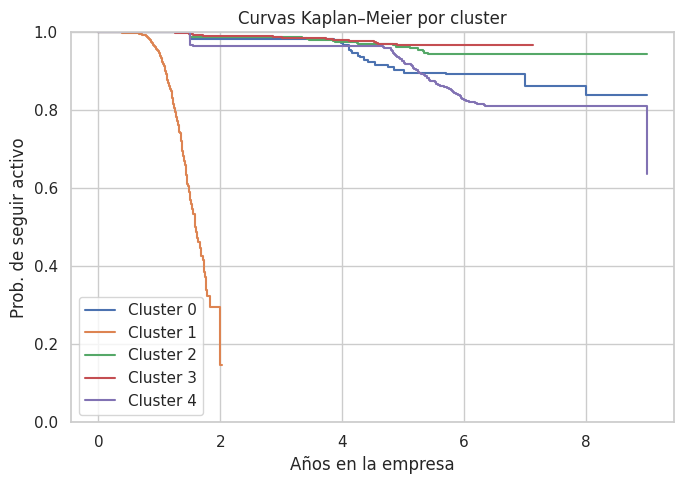

<lifelines.CoxPHFitter: fitted with 5165 total observations, 4238 right-censored observations>
             duration col = 'tenure'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 5165
number of events observed = 927
   partial log-likelihood = -6606.80
         time fit was run = 2025-05-11 21:00:40 UTC

---
             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                    
cluster_5_1  3.78     43.82      0.15            3.48            4.08               32.54               59.01
cluster_5_2 -1.20      0.30      0.21           -1.61           -0.80                0.20                0.45
cluster_5_3 -1.19      0.31      0.26           -1.71           -0.67                0.18                0.51
cluster_5_4  0.26      1.30      0.11            0.05            0.48                1.05                1.61

             cmp to     z      p  -log2(p)
covariate                                 
cluster_5_1    0.00 24.90 <0.005    452.15
cluster_5_2    0.00 -5.84 <0.005     27.52
cluster_5_3    0.00 -4.49 <0.005     17.09
cluster_5_4    0.00  2.42   0.02      6.03
---
Concordance = 0.79
Partial AIC = 13221.61
log-likelihood ratio test = 1418.15 on 4 df
-log2(p) of ll-ratio test = 1013.51

In [27]:
# PREGUNTA 4: ¿Cómo evoluciona la probabilidad de permanecer en la empresa a lo largo del tiempo y cómo difiere por cluster?

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter

FILE = "/content/DatasetFinal.xlsx"
df   = pd.read_excel(FILE)

surv_df = df[["Antigüedad", "Rotacion", "cluster_5"]].copy()
surv_df.rename(columns={"Antigüedad": "tenure", "Rotacion": "event"}, inplace=True)

km = KaplanMeierFitter()

plt.figure(figsize=(7,5))
for cl in sorted(surv_df["cluster_5"].unique()):
    mask = surv_df["cluster_5"] == cl
    km.fit(durations=surv_df.loc[mask, "tenure"],
           event_observed=surv_df.loc[mask, "event"],
           label=f"Cluster {cl}")
    km.plot(ci_show=False)

plt.title("Curvas Kaplan–Meier por cluster")
plt.xlabel("Años en la empresa")
plt.ylabel("Prob. de seguir activo")
plt.ylim(0,1); plt.grid(True); plt.tight_layout()
plt.show()

cox_df = pd.get_dummies(surv_df, columns=["cluster_5"], drop_first=True)

cox = CoxPHFitter()
cox.fit(cox_df, duration_col="tenure", event_col="event")
cox.print_summary()


In [28]:
pip install lifelines


In [29]:
import pandas as pd
from lifelines import CoxPHFitter

df = pd.read_excel("/content/DatasetFinal.xlsx")

surv_df = df[["Antigüedad", "Rotacion", "cluster_5"]].copy()
surv_df.rename(columns={"Antigüedad": "tenure", "Rotacion": "event"}, inplace=True)

cox_df_full = pd.get_dummies(surv_df, columns=["cluster_5"], drop_first=True)
cox_full = CoxPHFitter()
cox_full.fit(cox_df_full, duration_col="tenure", event_col="event")
print("AIC parcial del modelo completo:", cox_full.AIC_partial_)

cox_null = CoxPHFitter()
cox_null.fit(surv_df[["tenure", "event"]], duration_col="tenure", event_col="event")
print("AIC parcial del modelo nulo:", cox_null.AIC_partial_)


AIC parcial del modelo completo: 13221.606254868553
AIC parcial del modelo nulo: 14631.756976704877


In [32]:
# PREGUNTA 5: ¿Cuánto cuesta la rotación en cada cluster y dónde conviene invertir primero?
import pandas as pd

FILE = "/content/DatasetFinal.xlsx"
df = pd.read_excel(FILE)

rotados = df[df["Rotacion"] == 1].copy()

rotados["Coste_baja"] = rotados["Salario"] * 0.4

coste_cluster = rotados.groupby("cluster_5").agg(
    Bajas=("Coste_baja", "size"),
    Coste_total=("Coste_baja", "sum"),
    Coste_medio_por_baja=("Coste_baja", "mean")
).round(0)

coste_cluster = coste_cluster.sort_values("Coste_total", ascending=False)
print(coste_cluster)

coste_cluster.to_excel("Coste_Rotacion_por_Cluster.xlsx")

           Bajas  Coste_total  Coste_medio_por_baja
cluster_5                                          
1            402    4666120.0               11607.0
4            343    3521000.0               10265.0
0            137    1384263.0               10104.0
2             29     496400.0               17117.0
3             16     333000.0               20812.0


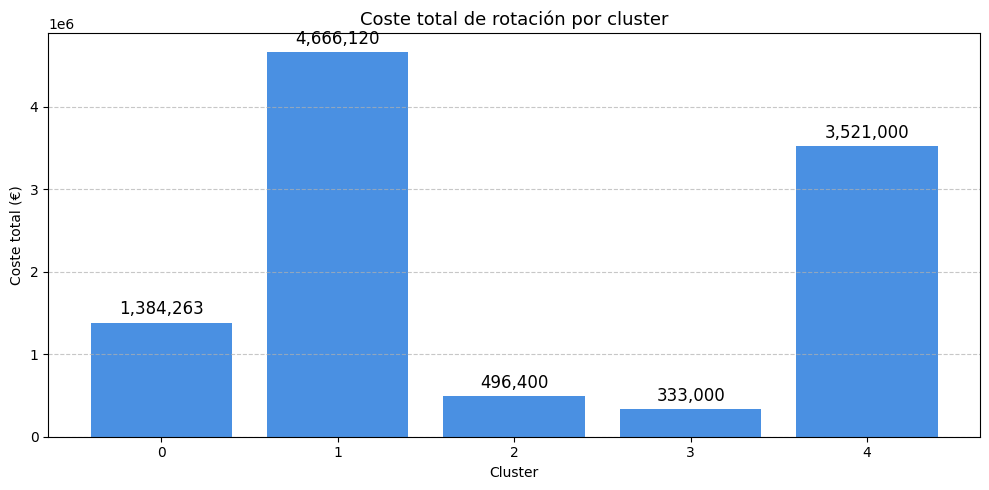

In [8]:
import matplotlib.pyplot as plt

clusters = ["0", "1", "2", "3", "4"]
costes = [1384263, 4666120, 496400, 333000, 3521000]

plt.figure(figsize=(10, 5))
bars = plt.bar(clusters, costes, color="#4A90E2")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50000, f"{int(yval):,}",
             ha='center', va='bottom', fontsize=12)

plt.title("Coste total de rotación por cluster", fontsize=13)
plt.xlabel("Cluster")
plt.ylabel("Coste total (€)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


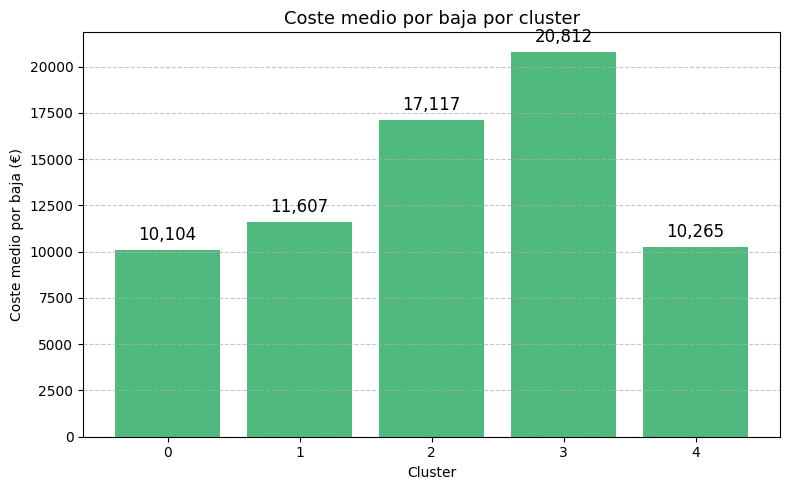

In [9]:
import matplotlib.pyplot as plt

clusters = ["0", "1", "2", "3", "4"]
coste_medio = [10104.0, 11607.0, 17117.0, 20812.0, 10265.0]

plt.figure(figsize=(8, 5))
bars = plt.bar(clusters, coste_medio, color="#50B97D")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 300, f"{int(yval):,}",
             ha='center', va='bottom', fontsize=12)

plt.title("Coste medio por baja por cluster", fontsize=13)
plt.xlabel("Cluster")
plt.ylabel("Coste medio por baja (€)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-35-0120fb899932>:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(label_quadrant)          # ahora es una Serie


Rotacion  cluster_5 Quadrant    Activo      Baja
0                 0       HH  1.000000  0.000000
1                 0       HL  0.890566  0.109434
2                 0       LH  0.949640  0.050360
3                 0       LL  0.857546  0.142454
4                 1       HH  0.764706  0.235294


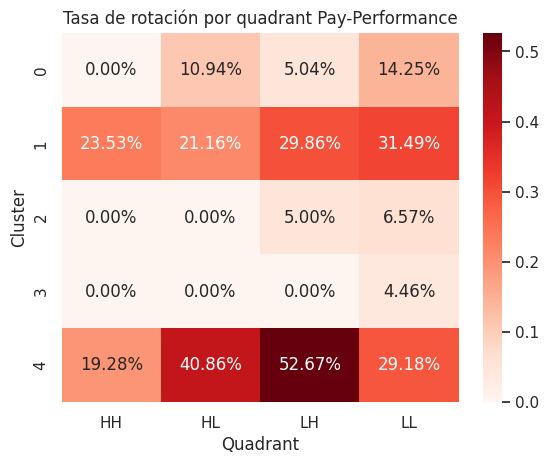

χ² global quadrant vs rotación: p = 0.0000


In [35]:
# PREGUNTA 6: ¿Los empleados con alto desempeño pero salario bajo se marchan más?

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

FILE = "/content/DatasetFinal.xlsx"
df   = pd.read_excel(FILE)

def label_quadrant(sub):
    q_salary_lo = sub["Salario"].quantile(0.25)
    q_salary_hi = sub["Salario"].quantile(0.75)
    q_perf_hi   = sub["Apreciacion"].quantile(0.75)
    q_perf_lo   = sub["Apreciacion"].quantile(0.25)

    cond_perf_hi = sub["Apreciacion"] >= q_perf_hi
    cond_perf_lo = sub["Apreciacion"] <= q_perf_lo
    cond_sal_hi  = sub["Salario"] >= q_salary_hi
    cond_sal_lo  = sub["Salario"] <= q_salary_lo

    quadrant = np.where( cond_perf_hi & cond_sal_lo, "HL",
               np.where( cond_perf_hi & cond_sal_hi, "HH",
               np.where( cond_perf_lo & cond_sal_hi, "LH","LL")))


    return pd.Series(quadrant, index=sub.index)

df["Quadrant"] = (
    df.groupby("cluster_5", group_keys=False)
      .apply(label_quadrant)
)

tab = (pd.crosstab(index=[df["cluster_5"], df["Quadrant"]],
                   columns=df["Rotacion"],
                   normalize="index")
         .rename(columns={0: "Activo", 1: "Baja"})
         .reset_index())

print(tab.head())

pivot = tab.pivot(index="cluster_5", columns="Quadrant", values="Baja")
sns.heatmap(pivot, annot=True, fmt=".2%", cmap="Reds")
plt.title("Tasa de rotación por quadrant Pay-Performance")
plt.ylabel("Cluster")
plt.show()

chi2, p, dof, exp = stats.chi2_contingency(
        pd.crosstab(df["Quadrant"], df["Rotacion"]))
print(f"χ² global quadrant vs rotación: p = {p:.4f}")


In [36]:
# PREGUNTA 7: ¿Qué ahorro obtendríamos si aplicamos una intervención de RR. HH. y reducimos la rotación?

import pandas as pd
import numpy as np

FILE = "/content/DatasetFinal.xlsx"

COSTE_BAJA = {0: 10104, 1: 11607, 2: 17117, 3: 20812, 4: 10265}

PARAMS = {

    1: dict(
        filtro       = lambda t: (t["Quadrant"] == "HL"),
        convert_pct  = 1.0,
        salary_uplift= 2000,
        bonus        = 0,
        delta_rot    = 0.40
    ),
    4: dict(
        filtro       = lambda t: (t["Quadrant"] == "HL"),
        convert_pct  = 1.0,
        salary_uplift= 2000,
        bonus        = 0,
        delta_rot    = 0.35
    ),
    3: dict(
        filtro       = lambda t: (t["Apreciacion"] >= t["Apreciacion"].quantile(0.70)),
        convert_pct  = 0.0,
        salary_uplift= 0,
        bonus        = 1000,
        delta_rot    = 0.25
    ),
    0: dict(
        filtro       = lambda t: (t["Rotacion"] == 0),
        convert_pct  = 0.0,
        salary_uplift= 0,
        bonus        = 300,
        delta_rot    = 0.30
    ),
    2: dict(
        filtro       = lambda t: (t["Rotacion"] == 0),
        convert_pct  = 0.0,
        salary_uplift= 0,
        bonus        = 0,
        delta_rot    = 0.15
    )
}

df = pd.read_excel(FILE)

if "Quadrant" not in df.columns:
    def label_quadrant(sub):
        q_sal_lo = sub["Salario"].quantile(0.25)
        q_sal_hi = sub["Salario"].quantile(0.75)
        q_perf_hi= sub["Apreciacion"].quantile(0.75)
        q_perf_lo= sub["Apreciacion"].quantile(0.25)
        hi_perf  = sub["Apreciacion"] >= q_perf_hi
        lo_perf  = sub["Apreciacion"] <= q_perf_lo
        hi_sal   = sub["Salario"] >= q_sal_hi
        lo_sal   = sub["Salario"] <= q_sal_lo
        return np.where( hi_perf & lo_sal, "HL",
               np.where( hi_perf & hi_sal, "HH",
               np.where( lo_perf & hi_sal, "LH", "LL")))
    df["Quadrant"] = df.groupby("cluster_5", group_keys=False).apply(label_quadrant)

def simulate(df, cluster, p):
    sub        = df[(df["cluster_5"] == cluster) & (df["Fijo / Temporal"] == 1)]
    eligibles  = sub[p["filtro"](sub)]

    n_conv     = int(len(eligibles) * p["convert_pct"])

    n_bonus    = len(eligibles) if p["bonus"] else 0


    bajas_elig = eligibles["Rotacion"].sum()
    evitadas   = int(bajas_elig * p["delta_rot"])

    ahorro     = evitadas * COSTE_BAJA[cluster]
    coste_conv = n_conv  * p["salary_uplift"]
    coste_bonus= n_bonus * p["bonus"]
    coste_tot  = coste_conv + coste_bonus
    roi        = ahorro / coste_tot if coste_tot else np.nan

    return {
        "Cluster": cluster,
        "Temporales": len(sub),
        "Eligibles": len(eligibles),
        "Convertidos": n_conv,
        "Ahorro €": round(ahorro),
        "Coste €": round(coste_tot),
        "ROI": round(roi, 2)
    }

resumen = [ simulate(df, cl, PARAMS[cl]) for cl in PARAMS.keys() ]
tabla = pd.DataFrame(resumen)
print(tabla)
tabla.to_excel("ROI_escenarios_segmentados.xlsx", index=False)


   Cluster  Temporales  Eligibles  Convertidos  Ahorro €  Coste €  ROI
0        1         432          0            0         0        0  NaN
1        4         304          0            0         0        0  NaN
2        3         580        242            0         0   242000  0.0
3        0         242        234            0         0    70200  0.0
4        2          15         15            0         0        0  NaN


<ipython-input-36-c76d71f55c5b>:70: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df["Quadrant"] = df.groupby("cluster_5", group_keys=False).apply(label_quadrant)


In [37]:
import pandas as pd
import numpy as np

FILE = "/content/MasterDataset_k5_noOut_modificado_final2.xlsx"

COSTE_BAJA = {0: 10104, 1: 11607, 2: 17117, 3: 20812, 4: 10265}


PARAMS = {

    1: dict(
        filtro=lambda t: (t["Quadrant"] == "HL") |
                        ((t["Quadrant"] == "HH") &
                         (t["Salario"] < t["Salario"].quantile(0.40))),
        convert_pct=1.0, salary_uplift=1000, bonus=0, delta_rot=0.35
    ),
    4: dict(
        filtro=lambda t: (t["Quadrant"] == "HL") |
                        ((t["Quadrant"] == "HH") &
                         (t["Salario"] < t["Salario"].quantile(0.40))),
        convert_pct=1.0, salary_uplift=1000, bonus=0, delta_rot=0.30
    ),
    3: dict(
        filtro=lambda t: t["Apreciacion"] >= t["Apreciacion"].quantile(0.85),
        convert_pct=0.0, salary_uplift=0, bonus=500, delta_rot=0.25
    ),
    0: dict(
        filtro=lambda t: t["Antigüedad"] < 1,
        convert_pct=0.0, salary_uplift=0, bonus=300, delta_rot=0.40
    ),
    2: dict(
        filtro=lambda t: t["Rotacion"] == 0,
        convert_pct=0.0, salary_uplift=0, bonus=0, delta_rot=0.00
    )
}


df = pd.read_excel(FILE)

if "Quadrant" not in df.columns:
    def quadrant(sub):
        q_sal_lo = sub["Salario"].quantile(0.25)
        q_sal_hi = sub["Salario"].quantile(0.75)
        q_perf_hi= sub["Apreciacion"].quantile(0.75)
        q_perf_lo= sub["Apreciacion"].quantile(0.25)
        hi_perf  = sub["Apreciacion"] >= q_perf_hi
        lo_perf  = sub["Apreciacion"] <= q_perf_lo
        hi_sal   = sub["Salario"] >= q_sal_hi
        lo_sal   = sub["Salario"] <= q_sal_lo
        return np.where( hi_perf & lo_sal, "HL",
               np.where( hi_perf & hi_sal, "HH",
               np.where( lo_perf & hi_sal, "LH", "LL")))
    df["Quadrant"] = df.groupby("cluster_5", group_keys=False).apply(quadrant)

def simulate(df, cluster, p):
    sub  = df[(df["cluster_5"] == cluster) & (df["Fijo / Temporal"] == 1)].copy()
    elig = sub[p["filtro"](sub)]

    n_conv    = int(len(elig) * p["convert_pct"])
    n_bonus   = len(elig) if p["bonus"] else 0
    bajas_elig= elig["Rotacion"].sum()
    evitadas  = int(bajas_elig * p["delta_rot"])

    ahorro    = evitadas * COSTE_BAJA[cluster]
    coste     = n_conv * p["salary_uplift"] + n_bonus * p["bonus"]
    roi       = round(ahorro / coste, 2) if coste else np.nan

    return dict(Cluster=cluster, Temporales=len(sub), Eligibles=len(elig),
                Convertidos=n_conv, Ahorro=round(ahorro),
                Coste=round(coste), ROI=roi)

tabla = pd.DataFrame([simulate(df, cl, PARAMS[cl]) for cl in PARAMS])
print(tabla)
tabla.to_excel("ROI_escenarios_segmentados_v2.xlsx", index=False)

   Cluster  Temporales  Eligibles  Convertidos  Ahorro   Coste  ROI
0        1         432          0            0       0       0  NaN
1        4         304          0            0       0       0  NaN
2        3         580        242            0       0  121000  0.0
3        0         242          0            0       0       0  NaN
4        2          15         15            0       0       0  NaN


<ipython-input-37-31f6a014d126>:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df["Quadrant"] = df.groupby("cluster_5", group_keys=False).apply(quadrant)


In [50]:
import pandas as pd
import numpy as np

FILE = "/content/DatasetFinal.xlsx"

COSTE_BAJA = {0: 10104, 1: 11607, 2: 17117, 3: 20812, 4: 10265}


PARAMS = {
    1: dict(
        filtro=lambda t: (t["Apreciacion"] >= t["Apreciacion"].quantile(0.70)) &
                         (t["Salario"] <= t["Salario"].quantile(0.40)),
        convert_pct=0.50, salary_uplift=500, bonus=0, delta_rot=0.35
    ),
    4: dict(
        filtro=lambda t: (t["Apreciacion"] >= t["Apreciacion"].quantile(0.70)) &
                         (t["Salario"] <= t["Salario"].quantile(0.40)),
        convert_pct=0.50, salary_uplift=500, bonus=0, delta_rot=0.30
    ),
    3: dict(
        filtro=lambda t: t["Apreciacion"] >= t["Apreciacion"].quantile(0.85),
        convert_pct=0.0, salary_uplift=0, bonus=0, delta_rot=0.00
    ),
    0: dict(
        filtro=lambda t: t["Antigüedad"] < 1,
        convert_pct=0.0, salary_uplift=0, bonus=0, delta_rot=0.00
    ),
    2: dict(
        filtro=lambda t: t["Rotacion"] == 0,
        convert_pct=0.0, salary_uplift=0, bonus=0, delta_rot=0.00
    )
}


df = pd.read_excel(FILE)

if "Quadrant" not in df.columns:
    def quadrant(sub):
        q_sal_lo = sub["Salario"].quantile(0.25)
        q_sal_hi = sub["Salario"].quantile(0.75)
        q_perf_hi = sub["Apreciacion"].quantile(0.75)
        q_perf_lo = sub["Apreciacion"].quantile(0.25)
        hi_perf = sub["Apreciacion"] >= q_perf_hi
        lo_perf = sub["Apreciacion"] <= q_perf_lo
        hi_sal = sub["Salario"] >= q_sal_hi
        lo_sal = sub["Salario"] <= q_sal_lo
        return np.where(hi_perf & lo_sal, "HL",
                        np.where(hi_perf & hi_sal, "HH",
                                 np.where(lo_perf & hi_sal, "LH", "LL")))
    df["Quadrant"] = df.groupby("cluster_5", group_keys=False).apply(quadrant)

def simulate(df, cluster, p):
    sub = df[(df["cluster_5"] == cluster) & (df["Fijo / Temporal"] == 1)].copy()
    elig = sub[p["filtro"](sub)]

    n_conv = int(len(elig) * p["convert_pct"])
    n_bonus = len(elig) if p["bonus"] else 0
    bajas_elig = elig["Rotacion"].sum()
    evitadas = int(bajas_elig * p["delta_rot"])

    ahorro = evitadas * COSTE_BAJA[cluster]
    coste = n_conv * p["salary_uplift"] + n_bonus * p["bonus"]
    roi = round(ahorro / coste, 2) if coste else np.nan

    return dict(Cluster=cluster, Temporales=len(sub), Eligibles=len(elig),
                Convertidos=n_conv, Ahorro=round(ahorro),
                Coste=round(coste), ROI=roi)


tabla = pd.DataFrame([simulate(df, cl, PARAMS[cl]) for cl in PARAMS])

print(tabla)
tabla.to_excel("ROI_escenarios_segmentados_FINAL.xlsx", index=False)


   Cluster  Temporales  Eligibles  Convertidos  Ahorro  Coste   ROI
0        1         432        127           63  104463  31500  3.32
1        4         304         91           45   51325  22500  2.28
2        3         580        242            0       0      0   NaN
3        0         242          0            0       0      0   NaN
4        2          15         15            0       0      0   NaN


<ipython-input-50-cf86f69df437>:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df["Quadrant"] = df.groupby("cluster_5", group_keys=False).apply(quadrant)


In [48]:
import pandas as pd
import numpy as np

FILE = "/content/DatasetFinal.xlsx"
df = pd.read_excel(FILE)

COSTE_BAJA = {0: 10104, 1: 11607, 2: 17117, 3: 20812, 4: 10265}

if "Quadrant" not in df.columns:
    def quadrant(sub):
        q_sal_lo = sub["Salario"].quantile(0.25)
        q_sal_hi = sub["Salario"].quantile(0.75)
        q_perf_hi = sub["Apreciacion"].quantile(0.75)
        q_perf_lo = sub["Apreciacion"].quantile(0.25)
        hi_perf = sub["Apreciacion"] >= q_perf_hi
        lo_perf = sub["Apreciacion"] <= q_perf_lo
        hi_sal = sub["Salario"] >= q_sal_hi
        lo_sal = sub["Salario"] <= q_sal_lo
        return np.where(hi_perf & lo_sal, "HL",
                        np.where(hi_perf & hi_sal, "HH",
                                 np.where(lo_perf & hi_sal, "LH", "LL")))
    df["Quadrant"] = df.groupby("cluster_5", group_keys=False).apply(quadrant)

def simulate_grid(df, cluster, filtro_func, convert_pct_list, uplift_list, delta_rot_list, bonus=0):
    results = []
    sub = df[(df["cluster_5"] == cluster) & (df["Fijo / Temporal"] == 1)].copy()
    elig_total = filtro_func(sub)
    for convert_pct in convert_pct_list:
        for uplift in uplift_list:
            for delta_rot in delta_rot_list:
                elig = sub[elig_total]
                n_conv = int(len(elig) * convert_pct)
                n_bonus = len(elig) if bonus else 0
                bajas_elig = elig["Rotacion"].sum()
                evitadas = int(bajas_elig * delta_rot)
                ahorro = evitadas * COSTE_BAJA[cluster]
                coste = n_conv * uplift + n_bonus * bonus
                roi = round(ahorro / coste, 2) if coste else np.nan
                results.append({
                    "Cluster": cluster,
                    "Convert_pct": convert_pct,
                    "Uplift": uplift,
                    "Delta_rot": delta_rot,
                    "Bonus": bonus,
                    "Eligibles": len(elig),
                    "Convertidos": n_conv,
                    "Ahorro": round(ahorro),
                    "Coste": round(coste),
                    "ROI": roi
                })
    return pd.DataFrame(results)

convert_pct_list = [0.5, 0.75, 1.0]
uplift_list = [500, 750, 1000]
delta_rot_list = [0.25, 0.30, 0.35]

filtro_c1 = lambda t: (t["Apreciacion"] >= t["Apreciacion"].quantile(0.70)) & \
                      (t["Salario"] <= t["Salario"].quantile(0.40))

grid_results_c1 = simulate_grid(df, 1, filtro_c1, convert_pct_list, uplift_list, delta_rot_list)

print(grid_results_c1)

    Cluster  Convert_pct  Uplift  Delta_rot  Bonus  Eligibles  Convertidos  \
0         1         0.50     500       0.25      0        127           63   
1         1         0.50     500       0.30      0        127           63   
2         1         0.50     500       0.35      0        127           63   
3         1         0.50     750       0.25      0        127           63   
4         1         0.50     750       0.30      0        127           63   
5         1         0.50     750       0.35      0        127           63   
6         1         0.50    1000       0.25      0        127           63   
7         1         0.50    1000       0.30      0        127           63   
8         1         0.50    1000       0.35      0        127           63   
9         1         0.75     500       0.25      0        127           95   
10        1         0.75     500       0.30      0        127           95   
11        1         0.75     500       0.35      0        127   

<ipython-input-48-8469244759b5>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df["Quadrant"] = df.groupby("cluster_5", group_keys=False).apply(quadrant)


MODELOS PREDICTIVOS

¿Es posible predecir si un empleado abandonará la organización en función de sus características personales, laborales y del entorno, y cuál es el modelo que lo hace con mayor precisión dentro de cada cluster?

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

df = pd.read_excel("/content/DatasetFinal.xlsx")

target = "Rotacion"
drop_general = ["cluster_5", "ID_EMPLEADO", target]

global_leakage_vars = [
    "% de jornada", "Salario", "Condicion", "Tipo de contrato",
    "Fijo / Temporal", "Rel. Laboral", "Horario", "Personas",
    "Motivo Baja", "Grado Incapacidad", "Apreciacion", "Centro",
    "GrdOcup", "Tiempo al centro", "DIAS TRABAJ. EN EL AÑO"
]

leak_vars_by_cluster = {
    1: [],
    2: ["Motivo Baja", "Personas", "% de jornada", "Rel. Laboral", "Condicion", "Tipo de contrato"],
    3: ["Motivo Baja", "Condicion", "Rel. Laboral", "Grado Incapacidad", "Fijo / Temporal"],
    4: ["Motivo Baja", "Condicion", "Rel. Laboral", "Grado Incapacidad", "Fijo / Temporal", "Salario", "Tipo de contrato", "Horario", "% de jornada"]
}


models = {
    "Logistic": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []


for cl in sorted(df["cluster_5"].unique()):
    print(f"\nEvaluando cluster {cl}")
    dfi = df[df["cluster_5"] == cl].copy()
    y = dfi[target]


    if cl in [0, 3]:
        vars_to_drop = drop_general + global_leakage_vars
    else:
        vars_to_drop = drop_general + leak_vars_by_cluster.get(cl, [])

    vars_to_drop = list(set(vars_to_drop))
    X = dfi.drop(columns=[col for col in vars_to_drop if col in dfi.columns])


    num_cols = X.select_dtypes(include="number").columns.tolist()
    cat_cols = X.select_dtypes(include="object").columns.tolist()

    numeric_transformer = Pipeline([("scaler", StandardScaler())])
    categorical_transformer = OneHotEncoder(handle_unknown="ignore")
    preproc = ColumnTransformer([
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ])


    for name, model in models.items():
        pipe = Pipeline([("prep", preproc), ("clf", model)])
        y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba")[:, 1]
        y_pred = (y_prob >= 0.5).astype(int)

        results.append({
            "Cluster": cl,
            "Modelo": name,
            "AUC": roc_auc_score(y, y_prob),
            "Accuracy": accuracy_score(y, y_pred),
            "Precision": precision_score(y, y_pred, zero_division=0),
            "Recall": recall_score(y, y_pred, zero_division=0),
            "F1": f1_score(y, y_pred, zero_division=0)
        })


results_df = pd.DataFrame(results)
results_df.sort_values(by=["Cluster", "AUC"], ascending=[True, False], inplace=True)
print("\nResultados Finales por Cluster:")
print(results_df)


results_df.to_excel("resultados_finales_clusters_realistas.xlsx", index=False)


Evaluando cluster 0

Evaluando cluster 1

Evaluando cluster 2

Evaluando cluster 3

Evaluando cluster 4

Resultados Finales por Cluster:
    Cluster            Modelo       AUC  Accuracy  Precision    Recall  \
3         0           XGBoost  0.994402  0.977760   0.881119  0.919708   
1         0      RandomForest  0.994220  0.982526   0.907801  0.934307   
2         0  GradientBoosting  0.992405  0.968229   0.881890  0.817518   
0         0          Logistic  0.860296  0.767276   0.290323  0.788321   
6         1  GradientBoosting  0.876174  0.815385   0.718354  0.564677   
7         1           XGBoost  0.868767  0.809091   0.677686  0.611940   
5         1      RandomForest  0.850359  0.803497   0.699670  0.527363   
4         1          Logistic  0.802258  0.739860   0.527881  0.706468   
8         2          Logistic  0.950907  0.896461   0.244898  0.827586   
11        2           XGBoost  0.921498  0.965924   0.600000  0.310345   
9         2      RandomForest  0.919078  0.97378

In [3]:
import pandas as pd
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from tabulate import tabulate


df = pd.read_excel("/content/MasterDataset_k5_noOut_modificado_final2.xlsx")


best_models = {
    0: ("RandomForest", RandomForestClassifier(random_state=42)),
    1: ("GradientBoosting", GradientBoostingClassifier(random_state=42)),
    2: ("Logistic", LogisticRegression(max_iter=1000, class_weight="balanced")),
    3: ("Logistic", LogisticRegression(max_iter=1000, class_weight="balanced")),
    4: ("RandomForest", RandomForestClassifier(random_state=42))
}


param_grids = {
    "Logistic": {
        "clf__C": [0.01, 0.1, 1, 10],
        "clf__penalty": ["l2"],
        "clf__solver": ["lbfgs", "saga"]
    },
    "XGBoost": {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [3, 5, 7],
        "clf__learning_rate": [0.01, 0.1],
        "clf__subsample": [0.8, 1.0]
    },
    "GradientBoosting": {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [3, 5],
        "clf__learning_rate": [0.05, 0.1],
        "clf__subsample": [0.8, 1.0]
    },
    "RandomForest": {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [None, 5, 10],
        "clf__min_samples_split": [2, 5]
    }
}


leak_vars = {
    0: ["Motivo Baja", "% de jornada", "Personas", "Salario", "Condicion", "Tipo de contrato", "Fijo / Temporal", "Rel. Laboral", "Horario", "Grado Incapacidad", "Apreciacion", "Centro", "GrdOcup", "Tiempo al centro", "DIAS TRABAJ. EN EL AÑO"],
    2: ["Motivo Baja", "Personas", "% de jornada", "Rel. Laboral", "Condicion", "Tipo de contrato"],
    3: ["Motivo Baja", "Condicion", "Rel. Laboral", "Grado Incapacidad", "Fijo / Temporal", "Horario", "Salario", "% de jornada", "Tipo de contrato"],
    4: ["Motivo Baja", "Condicion", "Rel. Laboral", "Grado Incapacidad", "Fijo / Temporal", "Salario", "Tipo de contrato", "Horario", "% de jornada"]
}

resumen_resultados = []


for cl in sorted(df["cluster_5"].unique()):
    print(f"\n🔍 Cluster {cl}")
    dfi = df[df["cluster_5"] == cl].copy()
    y = dfi["Rotacion"]


    drop_vars = ["Rotacion", "cluster_5", "ID_EMPLEADO"]
    if cl in leak_vars:
        drop_vars += leak_vars[cl]
    X = dfi.drop(columns=[col for col in drop_vars if col in dfi.columns])


    num_cols = X.select_dtypes(include="number").columns.tolist()
    cat_cols = X.select_dtypes(include="object").columns.tolist()

    preproc = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ])

    model_name, model = best_models[cl]
    param_grid = param_grids[model_name]

    pipe = Pipeline([
        ("prep", preproc),
        ("clf", model)
    ])

    grid = GridSearchCV(
        pipe, param_grid, scoring="roc_auc",
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1, verbose=1
    )

    grid.fit(X, y)


    print("Mejor AUC:", grid.best_score_)
    print("Mejores parámetros:", grid.best_params_)


    model_filename = f"modelo_cluster{cl}.pkl"
    joblib.dump(grid.best_estimator_, model_filename)
    print(f"Modelo guardado en: {model_filename}")

    resumen_resultados.append({
        "Cluster": cl,
        "Modelo": model_name,
        "AUC": round(grid.best_score_, 4),
        "Mejores parámetros": grid.best_params_,
        "Variables excluidas (leakage)": leak_vars.get(cl, "-")
    })

df_resumen = pd.DataFrame(resumen_resultados)


print("\nTabla resumen (Markdown):\n")
print(tabulate(df_resumen, headers='keys', tablefmt='github'))


df_resumen.to_excel("Resumen_modelos_por_cluster.xlsx", index=False)
print("\nArchivo Excel exportado: Resumen_modelos_por_cluster.xlsx")



🔍 Cluster 0
Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ Mejor AUC: 0.9947217760561016
🎯 Mejores parámetros: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
💾 Modelo guardado en: modelo_cluster0.pkl

🔍 Cluster 1
Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Mejor AUC: 0.8779167013824939
🎯 Mejores parámetros: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__subsample': 1.0}
💾 Modelo guardado en: modelo_cluster1.pkl

🔍 Cluster 2
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Mejor AUC: 0.9493976951511198
🎯 Mejores parámetros: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
💾 Modelo guardado en: modelo_cluster2.pkl

🔍 Cluster 3
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


✅ Mejor AUC: 0.9077878937007874
🎯 Mejores parámetros: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
💾 Modelo guardado en: modelo_cluster3.pkl

🔍 Cluster 4
Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ Mejor AUC: 0.8482370635663475
🎯 Mejores parámetros: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
💾 Modelo guardado en: modelo_cluster4.pkl

📋 Tabla resumen (Markdown):

|    |   Cluster | Modelo           |    AUC | Mejores parámetros                                                                                | Variables excluidas (leakage)                                                                                                                                                                                                                |
|----|-----------|------------------|--------|---------------------------------------------------------------------------------------------------|----------------------------------


🔍 Cluster 0

🔍 Cluster 1

🔍 Cluster 2

🔍 Cluster 3

🔍 Cluster 4


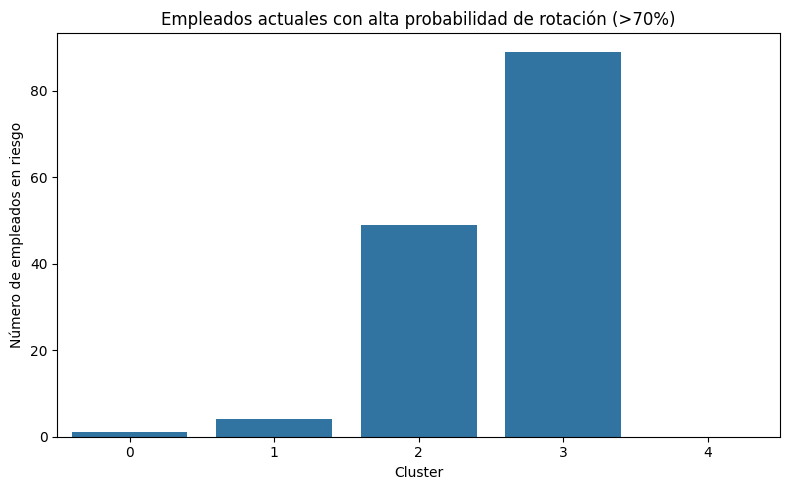


📊 Matriz de confusión por cluster


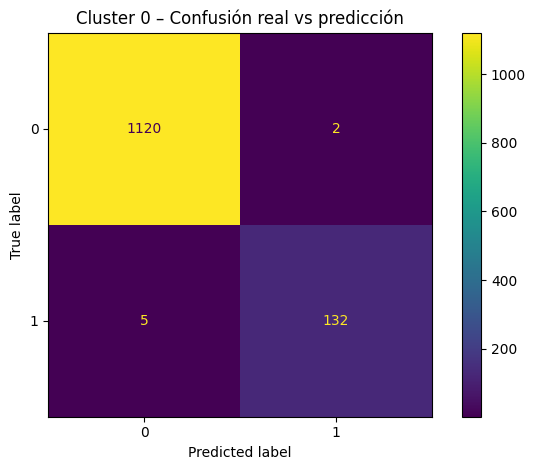

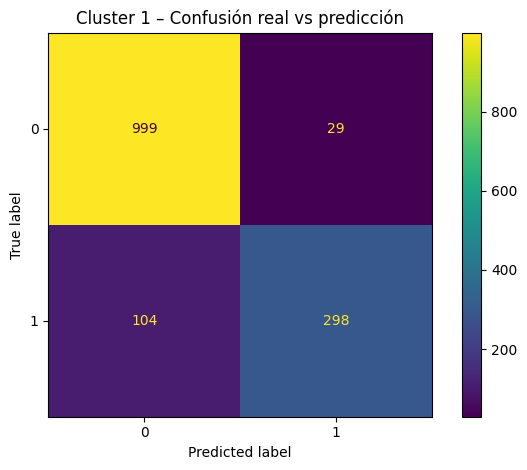

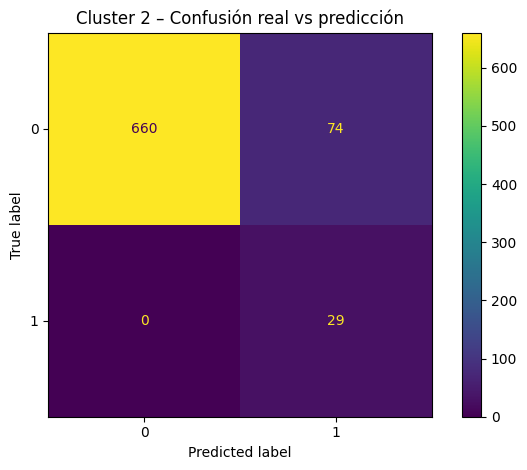

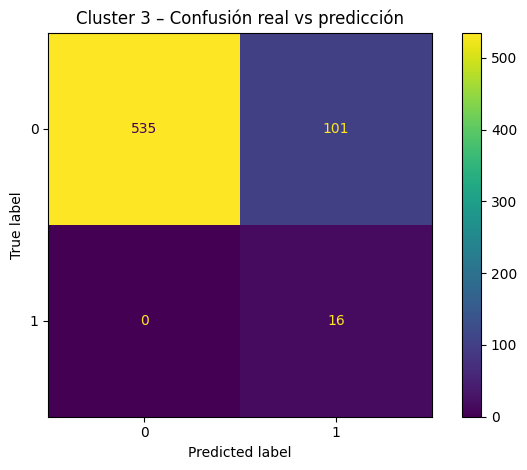

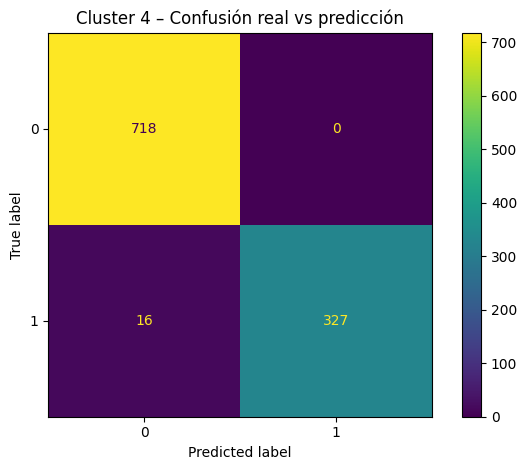

In [4]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_excel("/content/DatasetFinal.xlsx")

actuales = df[df["Rotacion"] == 0].copy()

umbral_riesgo = 0.7
clusters = sorted(df["cluster_5"].unique())
empleados_en_riesgo = []

leak_vars = {
    0: ["Motivo Baja", "% de jornada", "Personas", "Salario", "Condicion", "Tipo de contrato", "Fijo / Temporal", "Rel. Laboral", "Horario", "Grado Incapacidad", "Apreciacion", "Centro", "GrdOcup", "Tiempo al centro", "DIAS TRABAJ. EN EL AÑO"],
    2: ["Motivo Baja", "Personas", "% de jornada", "Rel. Laboral", "Condicion", "Tipo de contrato"],
    3: ["Motivo Baja", "Condicion", "Rel. Laboral", "Grado Incapacidad", "Fijo / Temporal", "Horario", "Salario", "% de jornada", "Tipo de contrato"],
    4: ["Motivo Baja", "Condicion", "Rel. Laboral", "Grado Incapacidad", "Fijo / Temporal", "Salario", "Tipo de contrato", "Horario", "% de jornada"]
}

for cl in clusters:
    print(f"\n Cluster {cl}")


    modelo = joblib.load(f"modelo_cluster{cl}.pkl")

    dfi = actuales[actuales["cluster_5"] == cl].copy()
    if dfi.empty:
        continue


    X = dfi.drop(columns=["Rotacion", "cluster_5", "ID_EMPLEADO"], errors="ignore")
    if cl in leak_vars:
        X = X.drop(columns=[v for v in leak_vars[cl] if v in X.columns], errors="ignore")

    probs = modelo.predict_proba(X)[:, 1]
    dfi["Prob_Rotacion"] = probs
    dfi["En_Riesgo"] = (probs >= umbral_riesgo).astype(int)

    empleados_en_riesgo.append(dfi)

riesgo_df = pd.concat(empleados_en_riesgo)


resumen = riesgo_df.groupby("cluster_5")["En_Riesgo"].sum().reset_index()
resumen.columns = ["Cluster", "N_empleados_en_riesgo"]

plt.figure(figsize=(8, 5))
sns.barplot(x="Cluster", y="N_empleados_en_riesgo", data=resumen)
plt.title("Empleados actuales con alta probabilidad de rotación (>70%)")
plt.ylabel("Número de empleados en riesgo")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()

print("\nMatriz de confusión por cluster")
for cl in clusters:
    modelo = joblib.load(f"modelo_cluster{cl}.pkl")
    dfi = df[df["cluster_5"] == cl].copy()
    y_true = dfi["Rotacion"]
    X = dfi.drop(columns=["Rotacion", "cluster_5", "ID_EMPLEADO"], errors="ignore")
    if cl in leak_vars:
        X = X.drop(columns=[v for v in leak_vars[cl] if v in X.columns], errors="ignore")

    y_pred = modelo.predict(X)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Cluster {cl} – Confusión real vs predicción")
    plt.tight_layout()
    plt.show()


In [5]:

riesgo_df_filtrado = riesgo_df[riesgo_df["En_Riesgo"] == 1]

riesgo_df_filtrado.to_excel("Empleados_en_riesgo_de_rotacion.xlsx", index=False)

print("Archivo guardado: Empleados_en_riesgo_de_rotacion.xlsx")


📁 Archivo guardado: Empleados_en_riesgo_de_rotacion.xlsx
